<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a custom dataset?

We've used some datasets with PyToch before. But how can you get your own data into PyTorch?

One of the ways to do so is via Custom datasets.

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.

**Resources:** https://www.learnpytorch.io/04_pytorch_custom_datasets/

**Dataset Creation code** https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb

## PyTorch Domain Libraries 

|Problem Space         |  Pre-build Datasets and Functions|
----------------------- |----------------------------------|
| Vision               |    torchvision.datasets           |
|Text                  |   torchtext.datsets               |
|Audio                 |   torchaudio.datasets             |
|Recommendation system |   torchrec.datasets               |
|Bonus                 |   TorchData*                      |





## Working with Custom Datasets

*  Getting a custom dataset with PyTorch

*  Becoming one with the data (preparing and visualizing)

*  Transforming data for use with a model

*  Loaing custom data with pre-built functions and custom functions.

*  Building FoodVision Mini to classify images

*  Comparing models with and without data augmentation

*  Making predictions on custom data (data not within our training or testing dataset.

##0. Importing PyTorch and setting up device-agnostic code.

In [52]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this course (Check the version of PyTorch)
torch.__version__

'1.13.1+cu116'

In [53]:
# Setup device-agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##1. Get Dataset

Our dataset is a subset of Food101 dataset.

Food101 starts with 101 different classes of food and 1000 images per class 750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

Why do this?


When starting out ML projects, it's important to try things on a small scale and then increae the scale when necessary.

the whole point is to speed up how fast you can experiment.


In [54]:
import requests
import zipfile
from pathlib import Path

#Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#if the image folder doesn't exist, download it and prepare it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)


#Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Download pizza, steak, sushi, sushi data...")
  f.write(request.content)

#unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Download pizza, steak, sushi, sushi data...
Unzipping pizza, steak, sushi data...


In [55]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

##2. Understanding the dataset (data preparation and data exploration)

In [56]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [57]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


### 2.1 Visualizing an image

Let's write some code to:

1.   Get all of the image paths 

2.   Pick a random image path using Python's random.choice()

3.   Get the ymage class name using `pathlib.Path.parent.stem`

4.   Since we're working with images, let's open the image with Python's PIL

5.   We'll then show the image and print metadata


In [58]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/train/pizza/3589437.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/3589437.jpg
Image class: pizza
Image height: 288
Image width: 512


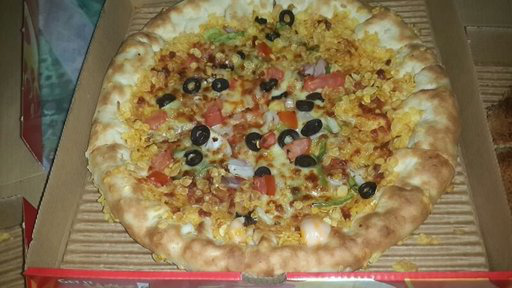

In [59]:
#Visualizing our image
import random 
from PIL import Image


# Set seed 
#random.seed(42)

#1. Get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))


#2. Pick a random image_path
random_image_path = random.choice(image_path_list)
print(random_image_path)


#3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)


#4. Open image
img = Image.open(random_image_path)


#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


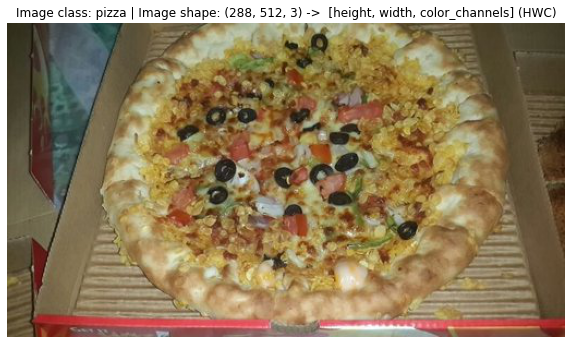

In [60]:
#Visualizing single image 
import numpy as np
import matplotlib.pyplot as plt


#turn the image to numpy array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} ->  [height, width, color_channels] (HWC)")
plt.axis(False);

##3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images).

2. Turn it into a `torch.utils.data.Dataset` to house all of our data in tensor format and subsequently return our dataset into `torch.utils.data.DataLoader` (A DataLoader creates an iterable or a batch version of our dataset.), we'll call these `Dataset` and `DataLoader`.

In [61]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


###3.1 Transforming data with torchvision.transforms

Transform help you get images ready to be used with a model/perfom data augmentation - https://pytorch.org/vision/stable/transforms.html


For the following code, images were selected randomly and reshape, manipulated into tensors for further analysis.

In [62]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),  #(Height, width)
    #Flip the images randomly on the horizontal(is a form of data augmentation) -> increasing the diversity of our dataset
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a troch.Tensor
    transforms.ToTensor()
])

In [63]:
data_transform(img)

tensor([[[0.2471, 0.2588, 0.2667,  ..., 0.1922, 0.2000, 0.1882],
         [0.2510, 0.2627, 0.2745,  ..., 0.2000, 0.2000, 0.1922],
         [0.2510, 0.2667, 0.2784,  ..., 0.2000, 0.2039, 0.1961],
         ...,
         [0.6118, 0.6353, 0.6627,  ..., 0.3608, 0.4118, 0.3922],
         [0.4588, 0.4588, 0.4784,  ..., 0.3843, 0.3725, 0.3647],
         [0.3765, 0.3529, 0.4118,  ..., 0.3961, 0.3922, 0.3647]],

        [[0.2275, 0.2392, 0.2471,  ..., 0.1804, 0.1882, 0.1765],
         [0.2314, 0.2431, 0.2549,  ..., 0.1882, 0.1882, 0.1804],
         [0.2314, 0.2471, 0.2588,  ..., 0.1922, 0.1922, 0.1843],
         ...,
         [0.1569, 0.1569, 0.1843,  ..., 0.2706, 0.3529, 0.3333],
         [0.1333, 0.1176, 0.2000,  ..., 0.3098, 0.3137, 0.3059],
         [0.1412, 0.1294, 0.2471,  ..., 0.3216, 0.3333, 0.3059]],

        [[0.1490, 0.1608, 0.1608,  ..., 0.1255, 0.1137, 0.1020],
         [0.1529, 0.1608, 0.1686,  ..., 0.1294, 0.1137, 0.1059],
         [0.1529, 0.1647, 0.1725,  ..., 0.1255, 0.1176, 0.

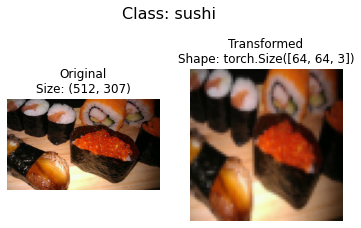

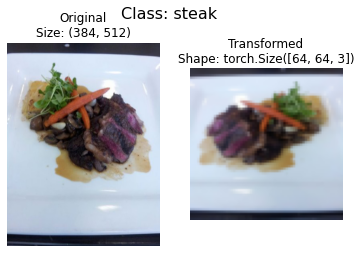

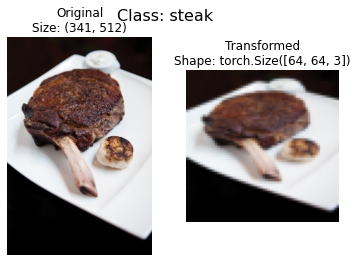

In [64]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
  """
  Selects random images from a path of images and loads and transforms
  them then plots the original vs the transforme version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Tansform and plot target image
      transformed_image = transform(f).permute(1, 2, 0)  # note we will need to change shape for matplotlib -> matplotlib prefers chlor channel last (C,H,W)->(H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42==None)



## 4. Option 1: Loading image data using ImageFolder 

We load image data using torchvision.datasets.ImageFolder -
https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [65]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) 


train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [66]:
# Get class names as list 
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [67]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [68]:
#Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels] 


Text(0.5, 1.0, 'pizza')

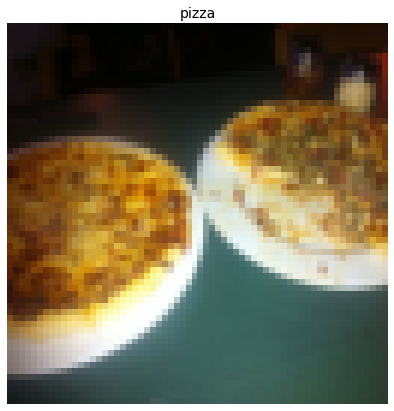

In [69]:
#Plot this using matplotlb
#Rearange the oder dimensions
img_permute = img.permute(1, 2, 0)

#Print out difference shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels] ")


# Plot the image 
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

### 4.1 Turn loaded images into `DataLoaded`'s

A DataLoader is going to help us turn our Dataset's into iterables and we can customise the batch_size so our model can see batch_size images at a time.

In [70]:
# Turn train and test datasets into DataLoader's 
from torch.utils.data import  DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f85fe5c7f40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85fe535070>)

In [71]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [72]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5 Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file

2. Want to be able to get class names from the Dataset

3. Want to be able to get classes as dictionary from the Dataset.


Pros:

    * Can create a `Dataset` out of almost anything

    * Not limited to PyTorch pre-built  `Dataset` functions.


Cons:
    
    * Even though you could create Dataset out of almost anything, it doesn't mean it will work...

    * Using a custom Dataset often results in us writing more code, which could be prone to errors or performace issues.


All custom datasets inPyTorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset


In [73]:
import os
import pathlib
import torch


from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List




In [74]:
# Instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1  Creating a helper function to get class names

We want a function to:

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).

2. Raise an error if the class names aren't found (if this happens, there might be something wrong directory structure).

3. Turn the class names into a dict and list and return them.

In [75]:
# Setup path for target directory 
target_directory = train_dir
print(f"Target dir: {target_directory}")


#Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found


Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [76]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [77]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  #1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names could not be found 
  if not classes:
    raise FileNotFoundError(f"Coudn't find any classes in {directory}... please check file structure.")



  #3. Create a dictionary of index labels (computers prefers numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx





In [78]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate the Functionality of the Original Image Folder

To create our own custom dataset, we wnat to:

1. Subclass `torch.utils.data.Dataset`

2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like t transform our data.

3. Create several attributes:
   * paths - paths to our images
   * Transform - the transform we'd like to use
   * Classes - a list of the target classes
   * class_to_idx - a dict of the target classes mapped to integer labels

4. Create a function to `load_images()`, this function will open an image.

5. Overwrite the `__len()__` method to return the length of our dataset.

6. Overwrite the `__getitem()__` method return a given sample when passed an index


**Note**Irrespective of the data you have, PyTorch gives a base to inherit from and you can write a function or a class somehow interacts with what ever data you are working with.

In [79]:
# Write a custom dataset class 
from torch.utils.data import Dataset

#1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform = None):
    #3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    #Create classes and class_to_idx attibutes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)


  #5. Overwrite __len__()
  def __len__(self) -> int:
    "Return the total number of samples."
    return len(self.paths)

  #6. Overwrite __getitem__() method to return a particular sample.
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (x, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]


    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx  #return data, label (X, y)
    else:
      return img, class_idx  #return untransformed image and label


In [80]:
# Create transform -> This code helps to transform the original images to a  deeplearning format.
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])




In [81]:
#Tranformed images to DeepLearning Format.
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)


test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [82]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f85fe773850>,
 <__main__.ImageFolderCustom at 0x7f85fe5430a0>)

In [83]:
len(train_data), len(train_data_custom)

(225, 225)

In [84]:
len(test_data), len(test_data_custom)

(75, 75)

In [85]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [86]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [87]:
#Check for equality between original ImageFolder Dataset and ImagFolderCustom Dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random images

1.  Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.

2. To prevent the display getting out of hand, let's cap the number of images to see at 10.

3. Set the random seed for reproducibility

4. Get a list of random sample indexes from the target dataset.

5. Setup a matplotlib plot.

6. Loop through the random sample images and plot them with matplotlib.

7. Make sure the dimensions for our images line up with matplotlib (HWC).

In [88]:
#1.  Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  #2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False 
    print(f"For display, purposes, n shoudn't be larger than 10, setting to 10 and removing shape display.")

  #3. Set the seed
  if seed:
    random.seed(seed)

  #4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #5. Setup plot 
  plt.figure(figsize= (16, 8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) #[color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples 
    plt.subplot(1, n, i+1) #keep track of i+1
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
    if display_shape:
      title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)

    


    

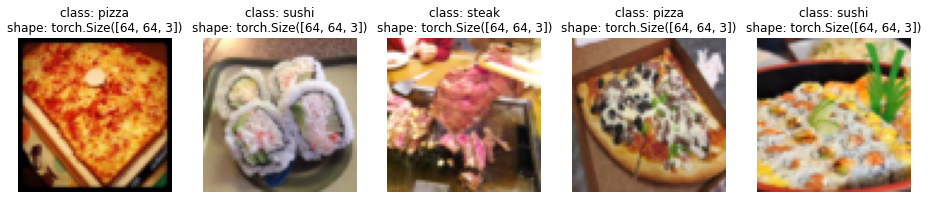

In [89]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                       n=5,
                       classes=class_names,
                       seed=None)

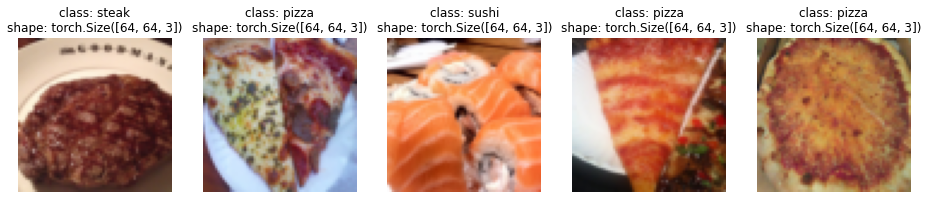

In [90]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)


### 5.4 Turn custom loaded images into DataLoader's

In [91]:
from torch.utils.data import DataLoader
BATCH_SZIE =32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f85fe1f7ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85fe1f7d60>)

In [92]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformation to the training images.

In other words, data augmentation is looking at the same image from different perspective(s) to artificically increase the diversity of a dataset.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

Why? Increase the diversity of our training data so that our images become harder for model to learn or it gets the chance to view the same image from different perspectives so that when you use your image classification model inpractice it seems the same image from many different angles.

Hopefully, This practice hopefuly results in a model that is generalizable to unseen data.


https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [93]:
# Let's look at trivaukaugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html
from torchvision import transforms 

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])


In [94]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1434806.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg')]

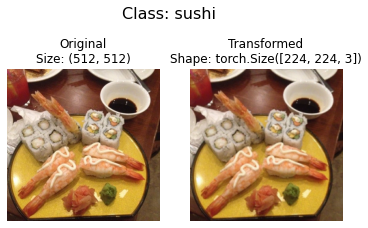

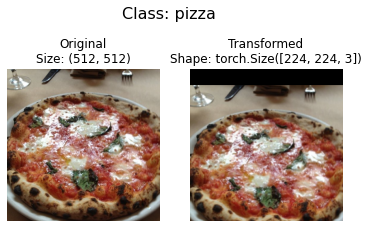

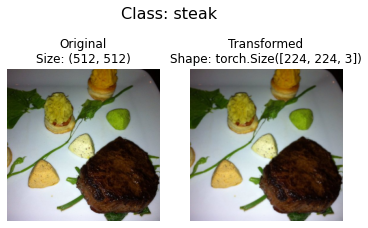

In [95]:
# Plot random images 
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture from the CNN Explainer websites: https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data fo model_0



#### Create a simple transform:
Premise for loading data:
 
We want to get our data from data folder under pizza_steak_sushi, from the train and test folders and from there respective folders.

One of the ways we can do that is by creating a transform.

In [96]:
# Create simple transform 
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), # the same size as the tinyVGG architecture on the CNN explainer website
    transforms.ToTensor() #irstly our images will be resize to 64 by 64 and then get converted into tensors where the values within the tensor will be between o and 
])

In [97]:
#1. Load and transfrom data at the same time
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)



#2. Turn the datasets into DataLoaders 
import os
from torch.utils.data import DataLoader


#Setup batch size and number of works
BATCH_SIZE =32 # number of batch sizes
NUM_WORKERS = os.cpu_count()   # The number of cpu we dedicate towards loading our data.

#Create DataLoader's
train_dataloader_simple = DataLoader(dataset= train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


### 7.2 Create TinyVGG model class 



In [98]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

          


In [99]:
#Create an instance of a TinyVGG to see if our model hold up
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)



In [100]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [101]:
# Try a forward pass 
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1837e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4456e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7723e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4218e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8272e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Use torchinfo to get information of the shapes going through our model

This return model architecture of our TinyVGG() model.

In [102]:
#install torch info
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [1, 3, 64, 64])  # Torchinfo must have the right input size -> it does an forward pass of whaever you pass with an input size of which ever you give it.



torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loops functions

* train_step() - takes in a model and dataloader and trains the model on the dataloader.

* test_step() - takes in a model and dataloader and evaluates the model on the dataloader.

In [103]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  #Put the model in train mode
  model.train()


  #Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)  # output model logits

    #2. Calculate the loss 
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5.  Optimizer step
    optimizer.step()

    #Calculate accuracy metric 
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get the average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc



In [122]:
# Create a test step function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  
  #Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y= X.to(device), y.to(device)

      #1. Forward pass
      test_pred_logits = model(X)

      #2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()  #Accumulate the loss

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

  #Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc




### 7.6 Creating a train() function to combine train_step() and test_step()

In [123]:
from tqdm.auto import tqdm

#1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  
  #2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}


  #3. Loop through training and testing steps for a number of epochs.-> keep track of train_loss and the test_los throughout our training.
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    #4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:4f} | Train acc: {train_acc: .4f} | Test loss : {test_loss: .4f} | Test acc: {test_acc: .4f}")

    #5. Update results dictionary 
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #6. Return the filled results at theend of the epochs 
  return results


### 7.7 Train and evaluate model_0 on our custom dataset.

In [124]:
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
NUM_EPOCHS = 5

# Recreate the intance of TinyVGG
model_0 = TinyVGG(input_shape=3, #number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device) #this create model_0


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

#Start the timer
from timeit import default_timer as timer
start_time = timer()


# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took.
end_time = timer()
print(f"Total taining time: {end_time-start_time: .3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | Train loss: 1.106342 | Train acc:  0.3047 | Test loss :  1.0983 | Test acc:  0.3116
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 1